In [1]:
from pathlib import Path # Manage folders and files
import rasterio as rio # Reads and writes geospatial raster data
from matplotlib import pyplot as plt # Display plots and images
import numpy as np # Multi-dimensional arrays

# Load and display LiDAR raster

The LiDAR raster files are located in the `data` folder. The rasters are in single band `TIFF` image format.

In [2]:
data_dir = Path('data')
list(data_dir.glob('*.tif'))

[WindowsPath('data/dsm_vox_50cm_tile_-11_0.tif'),
 WindowsPath('data/dsm_vox_50cm_tile_-12_0.tif'),
 WindowsPath('data/dsm_vox_50cm_tile_-7_1.tif')]

## 1. Load and display a raster file

- Open the raster file and read the 2D array (tip: you can type `?function` to display docstrings, e.g. `?rio.open` )
- Read the 2D array
- Display the 2D array as an image
    + what can we do to visualize more details?

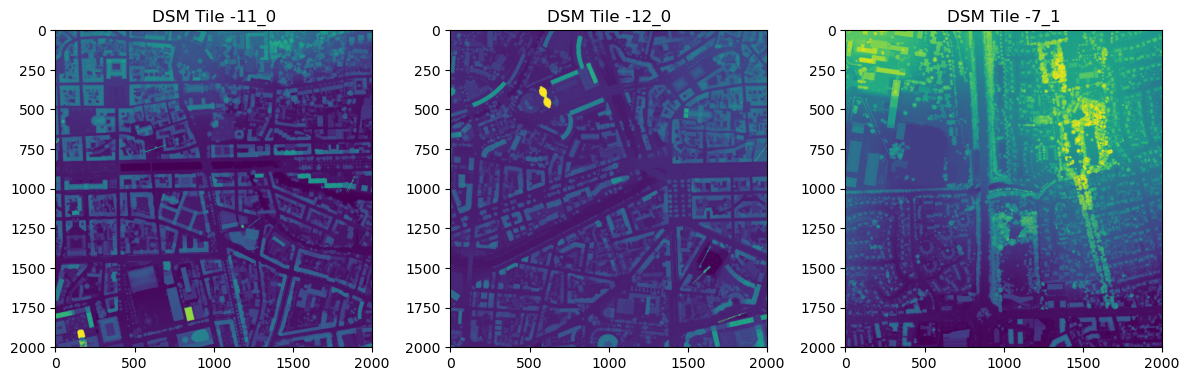

In [ ]:
array1 = rio.open(data_dir / 'dsm_vox_50cm_tile_-11_0.tif').read(1)
array2 = rio.open(data_dir / 'dsm_vox_50cm_tile_-12_0.tif') .read(1)
array3 = rio.open(data_dir / 'dsm_vox_50cm_tile_-7_1.tif').read(1)

# plot alltogether 
plt.figure(figsize=(12, 6))

plt.subplot(1,3,1)  
plt.imshow(array1)
plt.title('DSM Tile -11_0')

plt.subplot(1,3,2)
plt.imshow(array2)
plt.title('DSM Tile -12_0')

plt.subplot(1,3,3)
plt.imshow(array3)
plt.title('DSM Tile -7_1')

plt.tight_layout()
# plt.colorbar()
plt.show()


## 2. Visualize flat zones in the DSM

- Find the values of the flat zones
    + Sort the unique values in a list (or an array) of levels
- Display some flat zones
    + Display the flatzones of $i^{th}$ level

In [4]:
# sort values for array1
unique_values = np.unique(array1)
sorted_levels = np.sort(unique_values)
print(sorted_levels)

# sort values for array2
unique_values2 = np.unique(array2)
sorted_levels2 = np.sort(unique_values2)

# sort values for array3
unique_values3 = np.unique(array3)
sorted_levels3 = np.sort(unique_values3)


[ 23.13999939  23.14068985  23.1407795  ... 105.09249878 105.09999847
 105.11000061]


In [5]:
len(sorted_levels)

776995

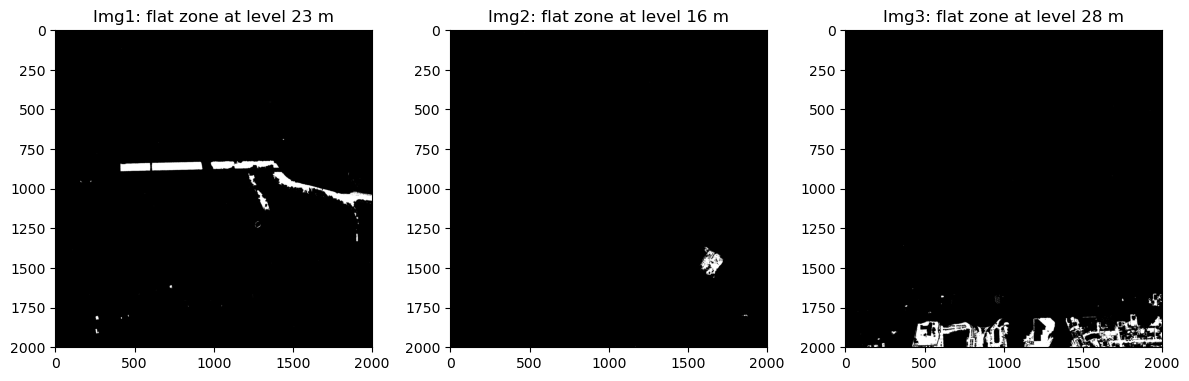

In [ ]:
# index of sorted levels
i = 5  # 6th level

# create a mask for this level adding the threshold
threshold = 1  # meters: used to include all pixels at this elevation level, considering small height variations (e.g. 23.23 vs 23.91 m)

# img1
level_value = sorted_levels[i]
flat_zone_mask = (array1 >= level_value - threshold) & (array1 <= level_value + threshold)
# img2
level_value2 = sorted_levels2[i]
flat_zone_mask2 = (array2 >= level_value2 - threshold) & (array2 <= level_value2 + threshold)
# img3
level_value3 = sorted_levels3[i]
flat_zone_mask3 = (array3 >= level_value3 - threshold) & (array3 <= level_value3 + threshold)

# visualize
plt.figure(figsize=(12, 6))

plt.subplot(1,3,1)  
plt.imshow(flat_zone_mask, cmap='gray')
plt.title(f'Img1: flat zone at level {level_value.astype(int)} m')

plt.subplot(1,3,2)
plt.imshow(flat_zone_mask2, cmap='gray')
plt.title(f'Img2: flat zone at level {level_value2.astype(int)} m')

plt.subplot(1,3,3)
plt.imshow(flat_zone_mask3, cmap='gray')
plt.title(f'Img3: flat zone at level {level_value3.astype(int)} m')

plt.tight_layout()
plt.show()

## 3. Create a max-tree of the DSM

Building a max-tree from scratch is a challenging assignement 🙂

In [5]:
# If you have time, you can start work on a max-tree algorithm 